# 机器学习概论

最近在看吴恩达的机器学习视频，虽然距离开这门课已经6年了，但是作为入门课丝毫不过时，6年前机器学习的知识和思想在今天仍然被广泛应用。

下面主要记录一下从视频课中学习到的机器学习的基础理论。


## 机器学习定义

先说下机器学习（Machine Learning）的定义，维基百科上机器学习有下面几种定义：

* 机器学习是一门人工智能的科学，该领域的主要研究对象是人工智能，特别是如何在经验学习中改善具体算法的性能。

* 机器学习是对能通过经验自动改进的计算机算法的研究。

* 机器学习是用数据或以往的经验，以此优化计算机程序的性能标准。

一种经常引用的英文定义是：A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

其实通俗的来说，机器学习算法就是一类从数据中自动分析获得规律，并利用规律对未知数据进行预测的算法。

## 机器学习分类

机器学习总的来说可以分成下面两类：

* 监督学习

* 无监督学习

两者都需要给定训练数据，然后根据训练数据学习出一个规则，当新的数据到来时，可以根据这个规则预测结果。

所不同的是监督学习需要人为的给训练数据标上对应的标签，而无监督学习不需要标签，完全由机器自己发现数据内在的规律。

常见的监督学习算法包括回归分析和统计分类，常见的无监督学习算法有生成对抗网络（GAN）、聚类。

半监督学习介于监督学习与无监督学习之间。

增强学习通过观察来学习做成如何的动作。每个动作都会对环境有所影响，学习对象根据观察到的周围环境的反馈来做出判断。

从解决的问题上看，机器学习又可以分为回归问题和分类问题。

回归就是对数据进行拟合，用于预测数据的走向，而分类就是预测数据的类别。

## 线性回归

线性回归是一种简单有效的回归模型，主要用于拟合**输入与输出呈线性关系**的数据。

对于一系列数据 $X = (x_1,x_2,\ldots,x_n)\in R^{m \times n}$，$x_i = (x_i^{(1)},x_i^{(2)},\ldots,x_i^{(m)})^T \in R^m$ 和 $y = (y^{(1)}, y^{(2)},\ldots,y^{(m)})^T \in R^m$，其数学形式如下：

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

为了方便计算，可以对 $X$ 进行扩充，增加一个 $x_0 = (1,\ldots,1)^T \in R^m$，使其成为 $X = (x_0,x_1,\ldots,x_n)\in R^{m(n+1)}$，这样，$h_{\theta}(x)$ 可以写成，

$$h_{\theta}(x) = X * \theta$$

其中，$\theta=(\theta_0,\theta_1,\ldots,\theta_n)^T \in R^{n+1}$ 为回归参数,也称作权值，线性回归的目的就是找出一组合适的 $\theta$ 使得 $\|h_{\theta}(x)-y\|$ 的值最小。

为此，需要定义代价函数（Cost Function, 思想类似于李雅普诺夫）：

$$J(\theta) = \frac{1}{2m}\sum_{j=1}^m (\theta_0 + \theta_1 x_1^{(j)} + \ldots + \theta_n x_n^{(j)} - y^{(j)})^2 = \frac{1}{2m}(h_{\theta}(x)-y)^T(h_{\theta}(x)-y)$$

值得一提的是，代价函数是所有样本损失函数（Loss Fuction）的均值。

这样对数据拟合的过程就转化为代价函数最小化的过程，求函数最小化可以采用梯度下降法。

代价函数$J(\theta)$，对于各个 $\theta_i$ 的偏导数为

$$\frac{\partial}{\partial \theta_i} J(\theta) = \frac{1}{m}\sum_{j=1}^m [(\theta_0 + \theta_1 x_1^{(j)} + \ldots + \theta_n x_n^{(j)} - y^{(j)})x_i^{(j)}]$$ 

$$\frac{\partial}{\partial \theta} J(\theta) = \frac{\alpha}{m}[(h_{\theta}(x)-y)^T * X]^T $$

采用梯度下降，回归参数的更新方法可以表示成如下形式：

$$\theta_i = \theta_i - \alpha\frac{\partial}{\partial \theta_i} J(\theta)$$

写成向量形式：

$$\theta = \theta - \frac{\alpha}{m}[(h_{\theta}(x)-y)^T * X]^T$$

其中 $\alpha$ 称为学习率。

线性回归算法简单而且由于代价函数总是凸函数，因此不会陷入局部最优，但是也有一些值得注意的地方。

### 学习率的选择

学习率 $\alpha$ 的选择至关重要，因为它直接影响到梯度下降的速度。

当 $\alpha$ 比较小时，梯度下降的速度就会比较慢，当 $\alpha$ 比较大时，迭代的速度虽然上去了，但是有可能引起代价函数不收敛的情况。

这样说可能不好理解，下面放上吴恩达老师课件上的图感受一下。

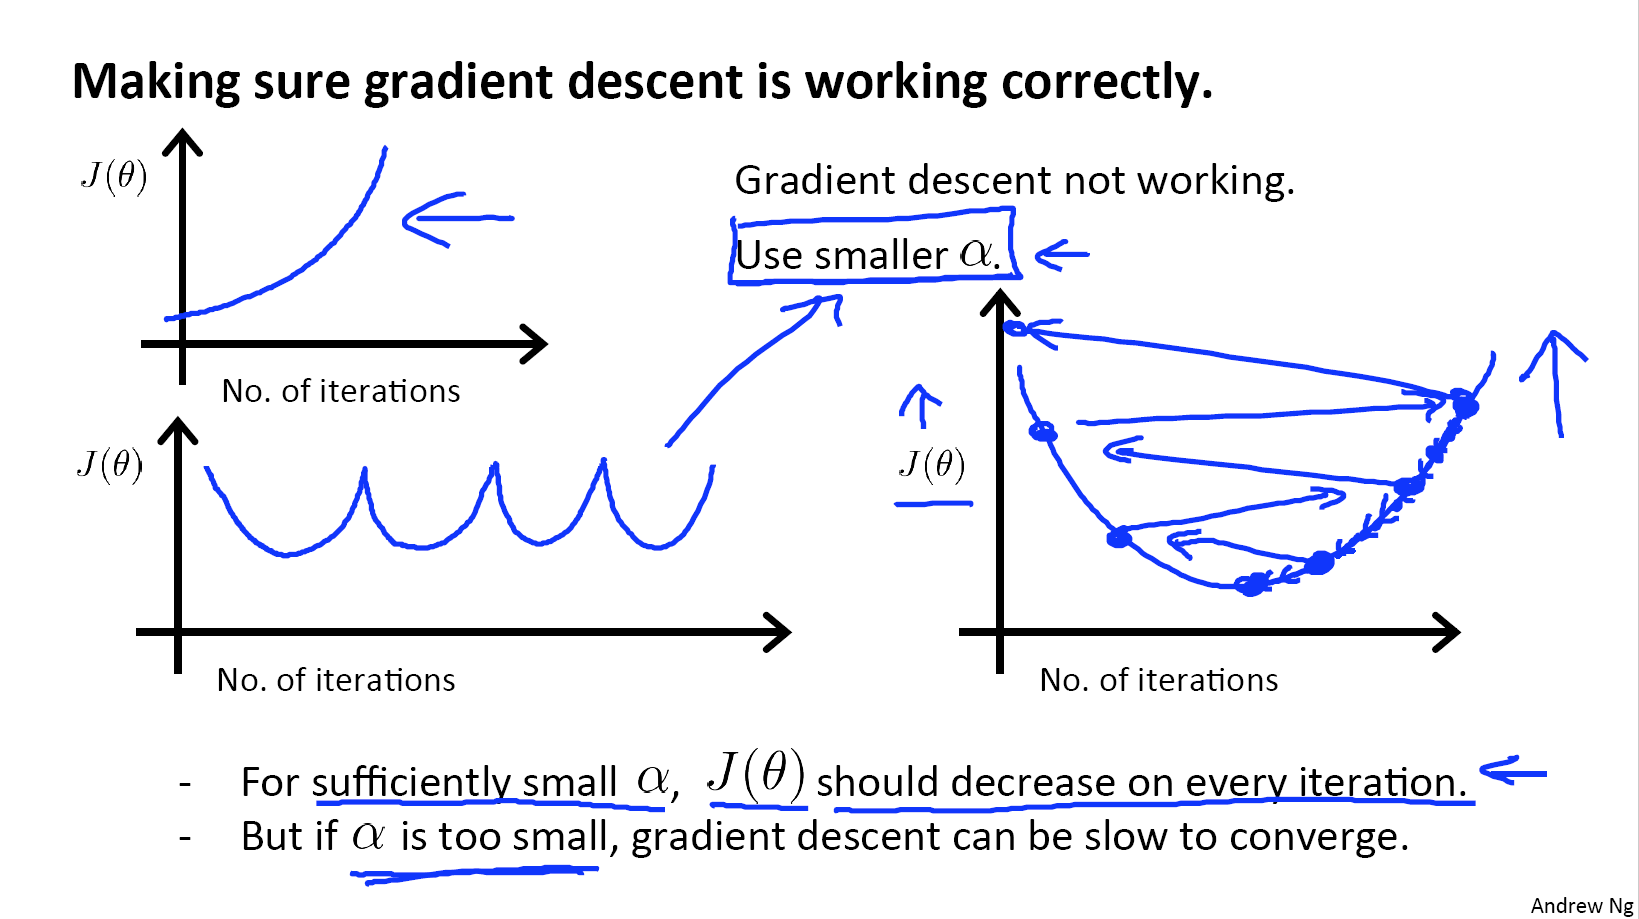

### 特征缩放

下面两图分别是当只有两个特征时(n=2)，线性回归代价函数的 3d 等高线图和 2d 等高线图，

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

Text(0.5,0,'J')

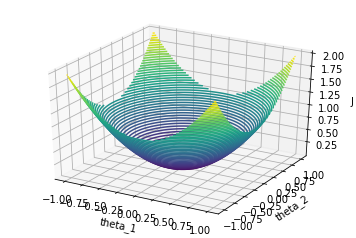

In [2]:
theta_1 = np.linspace(-1,1,100)
theta_2 = np.linspace(-1,1,100)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
J = theta_1 ** 2 + theta_2 ** 2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(theta_1, theta_2, J, 50)

ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('J')

Text(0,0.5,'theta_2')

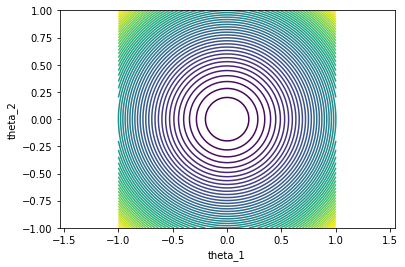

In [3]:
theta_1 = np.linspace(-1,1,100)
theta_2 = np.linspace(-1,1,100)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
J = theta_1 ** 2 + theta_2 ** 2

fig = plt.figure()
ax = plt.axes()
ax.contour(theta_1, theta_2, J, 50)

ax.axis('equal')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

由梯度下降法可知，$\theta_1$ 和 $\theta_2$ 具有相当的收敛速度。

Text(0,0.5,'theta_2')

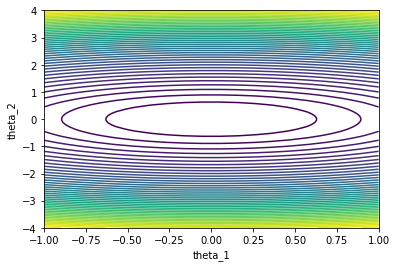

In [4]:
theta_1 = np.linspace(-1,1,20)
theta_2 = np.linspace(-4,4,100)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
J = theta_1 ** 2 + theta_2 ** 2

fig = plt.figure()
ax = plt.axes()
ax.contour(theta_1, theta_2, J, 50)

ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

而当其中一个特征，例如 $x_2$，变化区间要远远超过 $x_1$ 时，$\theta_1$ 的收敛速度就远远比 $\theta_2$ 小，这样在梯度下降迭代时可能发生收敛过慢的情形。下面放上吴恩达课件中的截图感受一下。

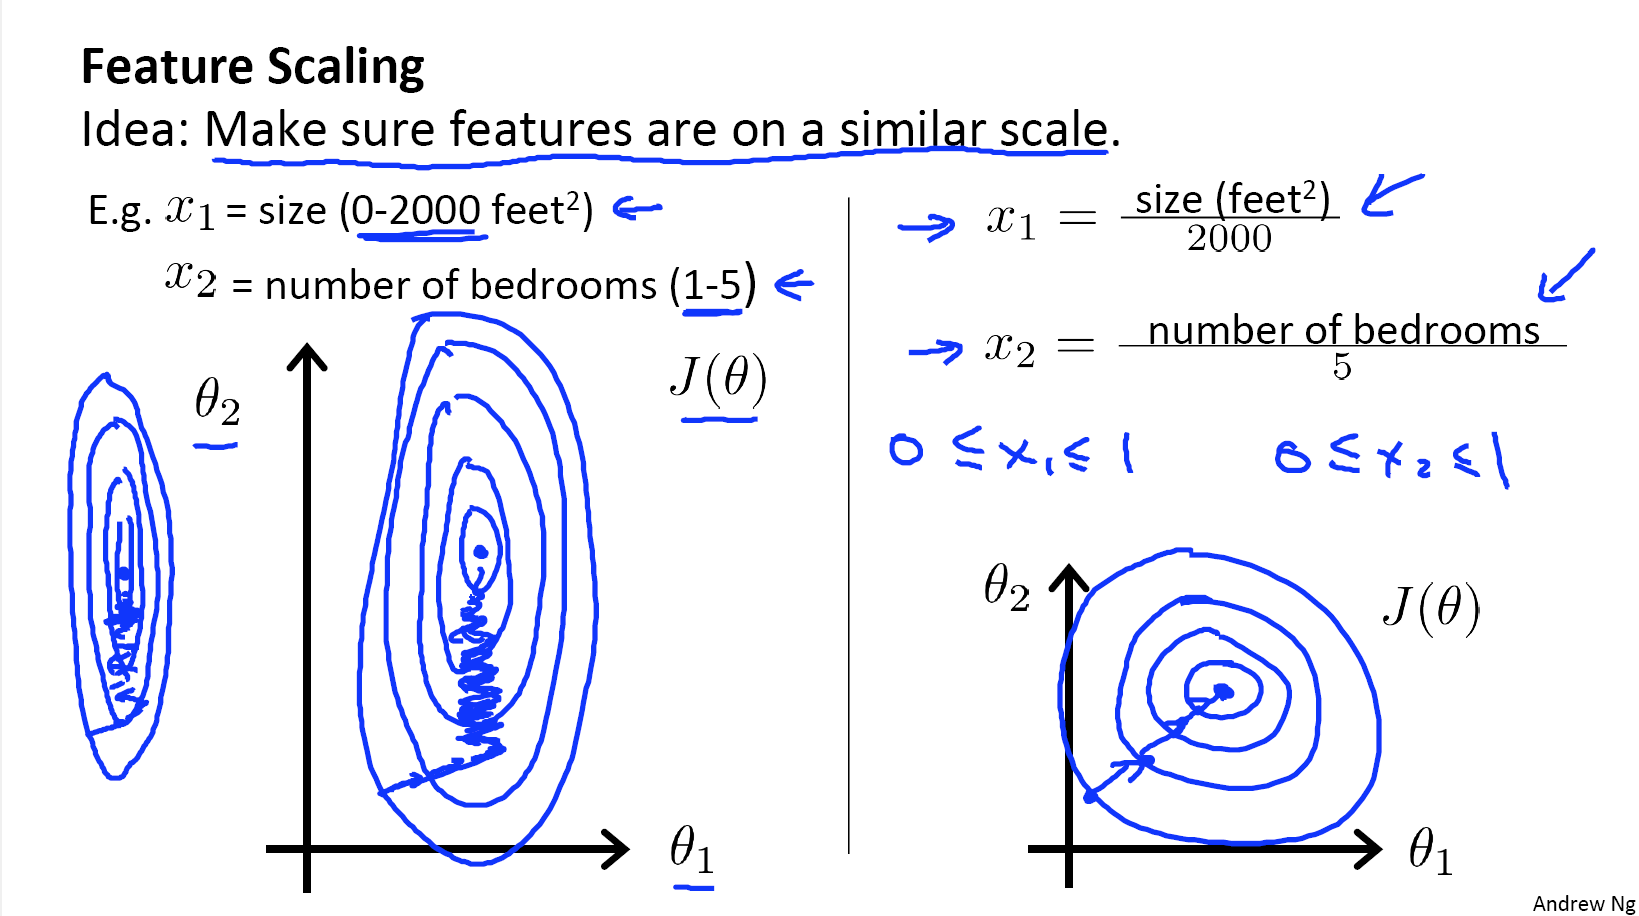

因此，为了解决这个问题一个办法就是特征缩放。特征缩放的意思就是对变化范围比较大或者比较小的特征进行缩放，使其映射到正常的区间内。例如 $x_1$ 的变化范围在 $0-2000$ 之间，我们可以令 $x_{1norm}=[x_1-mean(x_1)]/[max(x_1)-min(x_1)]$ 或者 $x_{1norm}=[x_1-mean(x_1)]/\sigma_1$，其中 $\sigma_1$ 为 $x_1$ 的标准差。

### 正规方程

解决线性回归除了梯度下降，还有一种一步到位的方法，就是正规方程。

我们注意到，寻找数据的最佳线性拟合，等价于寻找最小的代价函数，也即找到代价函数的极小值点。

因此，令代价函数的梯度为零，我们可以直接找到这样的点。

代价函数的梯度为，

$$\frac{\partial}{\partial \theta_i} J(\theta) = \frac{\alpha}{m}[(h_{\theta}(x)-y)^T * X]^T = \frac{\alpha}{m}[(X * \theta -y)^T * X]^T$$

令 

$$[(X * \theta -y)^T * X]^T = 0$$

得

$$\theta = (X^T X)^{-1}X^T y$$

这种方法看起来简单，快捷，但是只适用于样本的特征不太多的情况。

原因就在于这里的 $(X^T X)^{-1}$，我们知道 $X$ 是 $m*(n+1)$ 的矩阵，$X^T X$ 就是 $(n+1) * (n+1)$ 的矩阵，矩阵求逆的时间复杂度是 $O(n^3)$，当 $n$ 很大时，求逆就很难计算了。

一般来说特征数小于 $10,000$ 可以用正规方程，当特征数大于 $10,000$ 时就要考虑是否用梯度下降了，当特征数大于 $100,000$ 时，不要犹豫直接用梯度下降。

还有就是有时候可能会碰到 $X^T X$ 不可逆的情况，这种情况往往是特征中有两个参数线性相关造成的，这时候可以找到这两个线性相关的特征，去除一个。如果找不到的话，直接采用伪逆，也是可以的。

## 多项式回归

多项式回归是线性回归的一种推广形式，其不同点是，拟合函数的项可以是特征多项式而不仅仅是特征的线性组合。

具体地，对于一系列数据 $X = (x_1,x_2,\ldots,x_n)\in R^{m \times n}$，$x_i = (x_i^{(1)},x_i^{(2)},\ldots,x_i^{(m)})^T \in R^m$ 和 $y = (y^{(1)}, y^{(2)},\ldots,y^{(m)})^T \in R^m$，多项式回归的数学形式如下：

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_2^2 + \theta_5 x_1 x_2 + \cdots$$

根据样本的特点，特征多项式的次数可以是任意的。

为了便于计算，我们需要对输入数据进行重构，根据样本的特点，将非一次方项和交叉项放在 $x_n$ 的后面，重构后的数据表示为 $X_r = (x_0, x_1, x_2, \ldots, x_n, x_{n+1},\ldots, x_N)\in R^{m (N+1)}$。

其中 $x_0 = (1,\ldots,1)^T \in R^m$，$x_{n+1}=x_1^2, x_{n+2} = x_2^2, \cdots$，这样，$h_{\theta}(x)$ 可以写成，

$$h_{\theta}(x) = X * \theta$$

其中，$\theta=(\theta_0,\theta_1,\ldots,\theta_N)^T \in R^{N+1}$。

定义代价函数：

$$J(\theta) = \frac{1}{2m}\sum_{j=1}^m (\theta_0 + \theta_1 x_1^{(j)} + \ldots + \theta_N x_N^{(j)} - y^{(j)})^2 = \frac{1}{2m}(h_{\theta}(x)-y)^T(h_{\theta}(x)-y)$$

这样对数据拟合的过程就转化为代价函数最小化的过程，求函数最小化可以采用梯度下降法。代价函数$J(\theta)$，对于各个 $\theta_i$ 的偏导数为

$$\frac{\partial}{\partial \theta_i} J(\theta) = \frac{1}{m}\sum_{j=1}^m [(\theta_0 + \theta_1 x_1^{(j)} + \ldots + \theta_n x_n^{(j)} - y^{(j)})x_i^{(j)}]$$ 

$$\frac{\partial}{\partial \theta} J(\theta) = \frac{\alpha}{m}[(h_{\theta}(x)-y)^T * X_r]^T$$

采用梯度下降，回归参数的更新方法可以表示成如下形式：

$$\theta_i = \theta_i - \alpha\frac{\partial}{\partial \theta_i} J(\theta)$$

写成向量形式：

$$\theta = \theta - \frac{\alpha}{m}[(h_{\theta}(x)-y)^T * X]^T$$

其中 $\alpha$ 称为学习率。

对于多项式回归，尤其需要注意特征缩放问题。

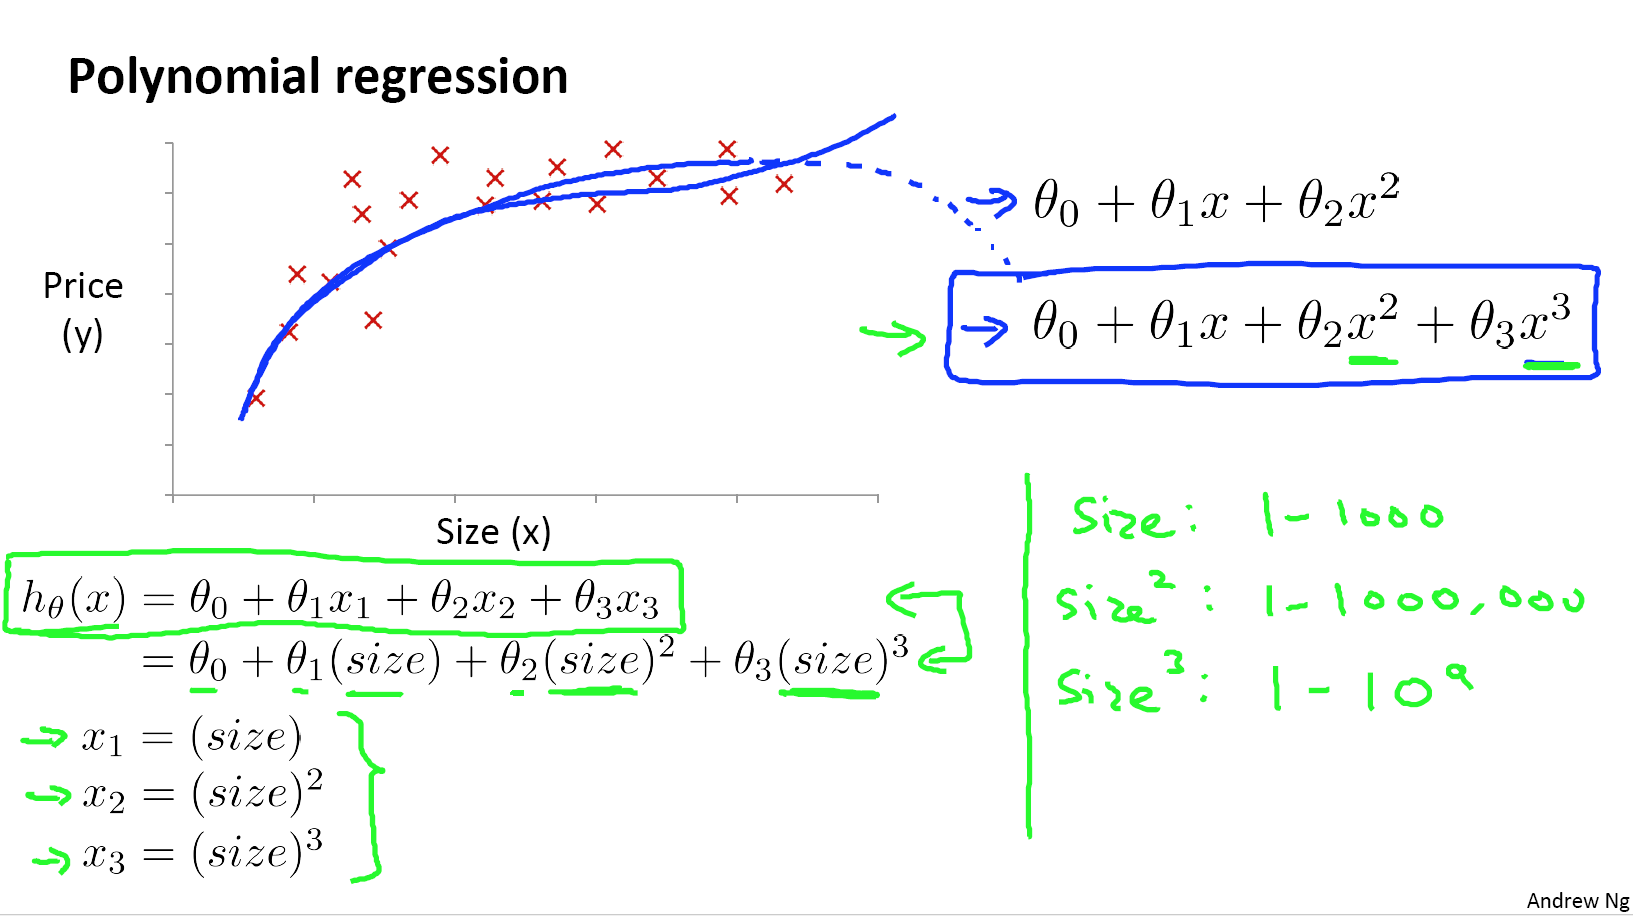

另外，多项式回归也可以采用正规方程的方法。不在赘述。

## 逻辑回归

逻辑回归虽然名字中带有回归，实际上是一种分类算法。

同样的，对于一系列扩充后数据 $X = (x_0,x_1,x_2,\ldots,x_n)\in R^{m(n+1)}$，$x_i = (x_i^{(1)},x_i^{(2)},\ldots,x_i^{(m)})^T \in R^m$ 和 $y = (y^{(1)}, y^{(2)},\ldots,y^{(m)})^T \in \{0, 1\}^m$，其中 $0$ 和 $1$，代表数据的类别，逻辑回归的形式如下：

$$h_{\theta}(x) =g(X*\theta) = \frac{1}{1+\exp(-X*\theta)}$$

那么它是如何实现分类的呢？奥秘就在这个函数，

$$g(Z)=\frac{1}{1+\exp(-Z)}$$

这是一个 Sigmoid Function 也叫做 Logistic Function，其特点是在0到1之间单调递增。

我们可以把逻辑回归的输出当作分类为1的概率，当输出大于（或大于等于）0.5时，认为属于分类1，当小于0.5时认为是分类0.

Text(0,0.5,'g(Z)')

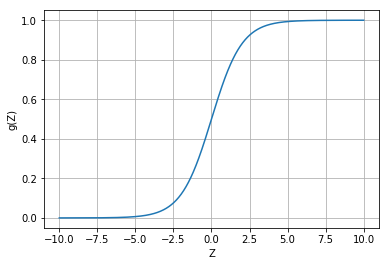

In [5]:
x = np.linspace(-10,10,1000)
y = 1/(1+np.exp(-x))
fig = plt.figure()
ax = plt.axes()
plt.plot(x, y)
plt.grid()

ax.set_xlabel('Z')
ax.set_ylabel('g(Z)')

那么，逻辑回归的代价函数该怎么取呢？

假如仍选择

$$J(\theta) = \frac{1}{2m}(h_{\theta}(x)-y)^T(h_{\theta}(x)-y)$$

由于这里的 $h_{\theta}(x)$ 是非线性的（相对于 $\theta$），这就会导致代价函数不是凸函数，进而就难以对其进行最小化。

下面是一个只有两个特征的代价函数的等高线图，可以看出，其波谷有两个，如果采用梯度下降就很容易陷入局部最优。

Text(0,0.5,'theta_2')

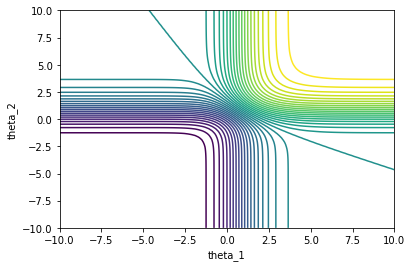

In [6]:
theta_1 = np.linspace(-10,10,100)
theta_2 = np.linspace(-10,10,100)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
h1 = 1 / (1+np.exp(-theta_1))
h2 = 1 / (1+np.exp(-theta_2))

J = h1 ** 2 + h2 ** 2

fig = plt.figure()
ax = plt.axes()
ax.contour(theta_1, theta_2, J, 40)

ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')

为了避免这种情况，逻辑回归的损失函数可以选择为以下这种形式：

$$Cost(h_{\theta}(x^{(j)}),y^{(j)})=\begin{cases}
-\log(h_{\theta}(x^{(j)})) & \text{if } y^{(j)} = 1,\\
-\log(1-h_{\theta}(x^{(j)})) & \text{if } y^{(j)} = 0.
\end{cases}$$

从下图可以看出，当 $y^{(j)}=1$ 时，损失函数随着 $h_{\theta}(x^{(j)})$ 的增加而减小，当 $h_{\theta}(x^{(j)})=1$ 时，损失函数为0，$h_{\theta}(x^{(j)})$ 距离 $y$ 越远，损失函数越大；当 $y^{(j)}=0$ 时，损失函数随着 $h_{\theta}(x^{(j)})$ 的增加而增大，当 $h_{\theta}(x^{(j)})=0$ 时，损失函数为0，$h_{\theta}(x^{(j)})$ 距离 $y^{(j)}$ 越远，损失函数越大。

Text(0.5,1,'Cost Function when y=0')

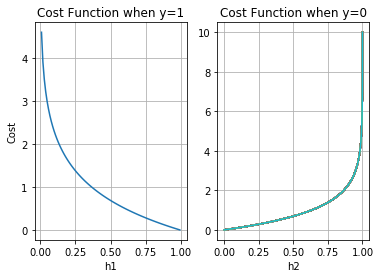

In [31]:
h1 = np.linspace(0.01,1,100)
h1 = np.linspace(0.01,0.99,100)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(h1, -np.log(h1))
ax1.grid()
ax1.set_xlabel('h1')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Function when y=1')

ax2.plot(h2, -np.log(1-h2))
ax2.grid()
ax2.set_xlabel('h2')
ax2.set_title('Cost Function when y=0')

逻辑回归的损失函数还有一种等价的写法：

$$Cost(h_{\theta}(x^{(j)}), y^{(j)}) = -y^{(j)}\log(h_{\theta}(x^{(j)}))-(1-y^{(j)})\log(1-h_{\theta}(x^{(j)}))$$

对应的代价函数可以写成：

$$J(\theta) = -\frac{1}{m}\sum_{j=1}^m[ y^{(j)}\log(h_{\theta}(x^{(j)})+(1-y^{(j)})\log(1-h_{\theta}(x^{(j)})]=-\frac{1}{m}[y^T\log(h_{\theta}(x))+(1-y)^T\log(1-h_{\theta}(x))]$$

有了代价函数，就可以对模型优化了，这里仍然采用梯度下降法，可以求得代价函数的对 $\theta_i$ 的偏导为：

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m}\sum_{i=1}^m[h_{\theta}(x^{(j)})-y^{(j)}]x_i^{(j)}$$

写成向量形式：

$$\frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m}[(h_{\theta}(x)-y)^T * X]^T$$

这在形式上和线性回归或多项式回归一致，但是却不是同一个东西，因为 $h_{\theta}(x)$ 是不一样的。

同样的，采用梯度下降，回归参数的更新方法可以表示成如下形式：

$$\theta_i = \theta_i - \alpha\frac{\partial}{\partial \theta_i} J(\theta)$$

写成向量形式：

$$\theta = \theta - \frac{\alpha}{m}[(h_{\theta}(x)-y)^T * X]^T$$

由于 $h_{\theta}(x)$ 的非线性特征，逻辑回归没有对应的正规方程方法。

### 其他优化方法

对于代价函数最小值的过程，除了采用梯度下降，还有其他的算法，例如[共轭梯度(conjugate gradient)](https://en.wikipedia.org/wiki/Conjugate_gradient_method)、[BFGS(Broyden–Fletcher–Goldfarb–Shanno)](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)、[L-BFGS(Limited-memory BFGS)](https://en.wikipedia.org/wiki/Limited-memory_BFGS)等。其中后两种都是一类[拟牛顿算法](https://en.wikipedia.org/wiki/Quasi-Newton_method)。

这些算法的优点是不用选择更新率 $\alpha$，而且通常比梯度下降法快，缺点就是实现较复杂，具体的算法这里不再推导。